## Ядерные методы в R

In [5]:
library('kedd')
library('np')

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-10)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]



In [6]:
options(repr.plot.width = 10, repr.plot.height = 6)

In [3]:
?density

In [12]:
par(cex.lab = 20)

## Ядерные оценки плотности

Полная документация с примерами https://cran.r-project.org/web/packages/kedd/vignettes/kedd.pdf

Ядра. Параметр `deriv.order` &mdash; порядок производной, по умолчанию 0.

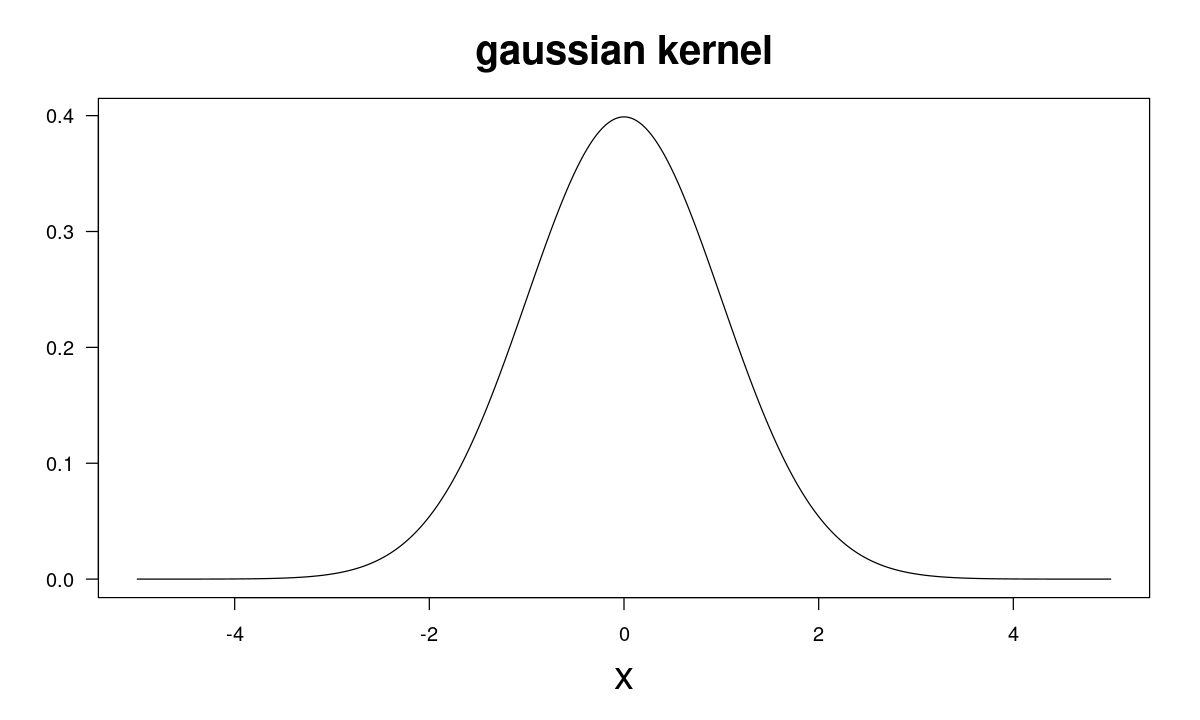

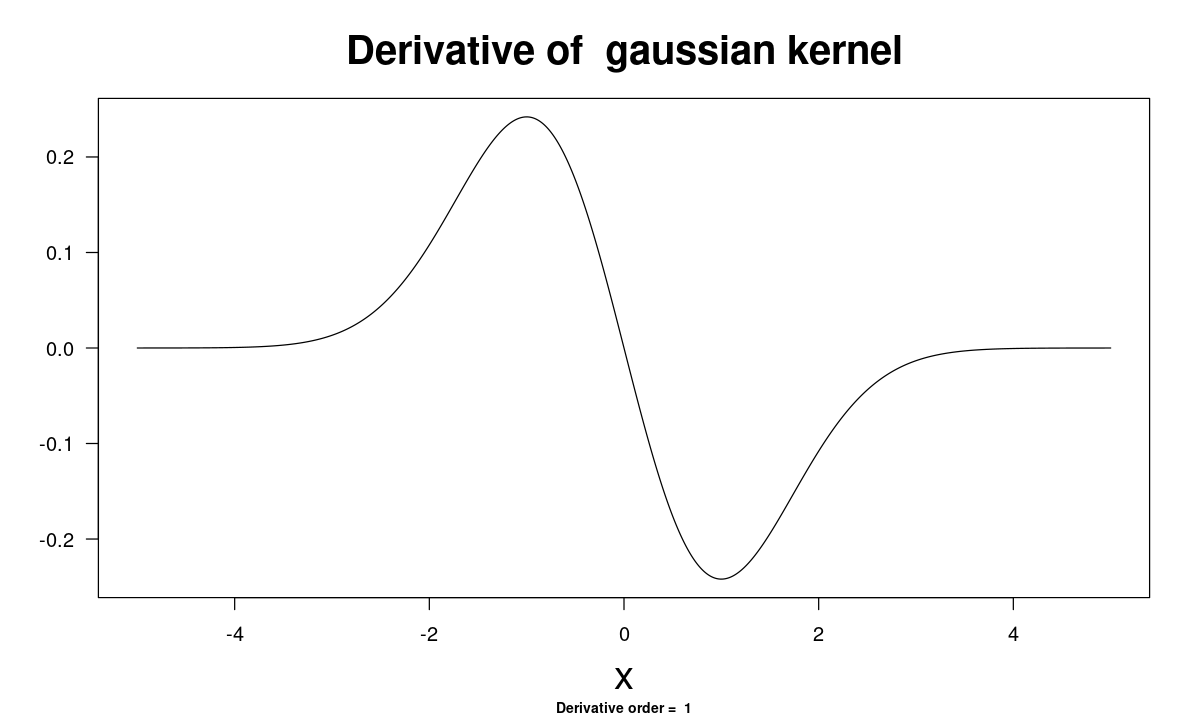

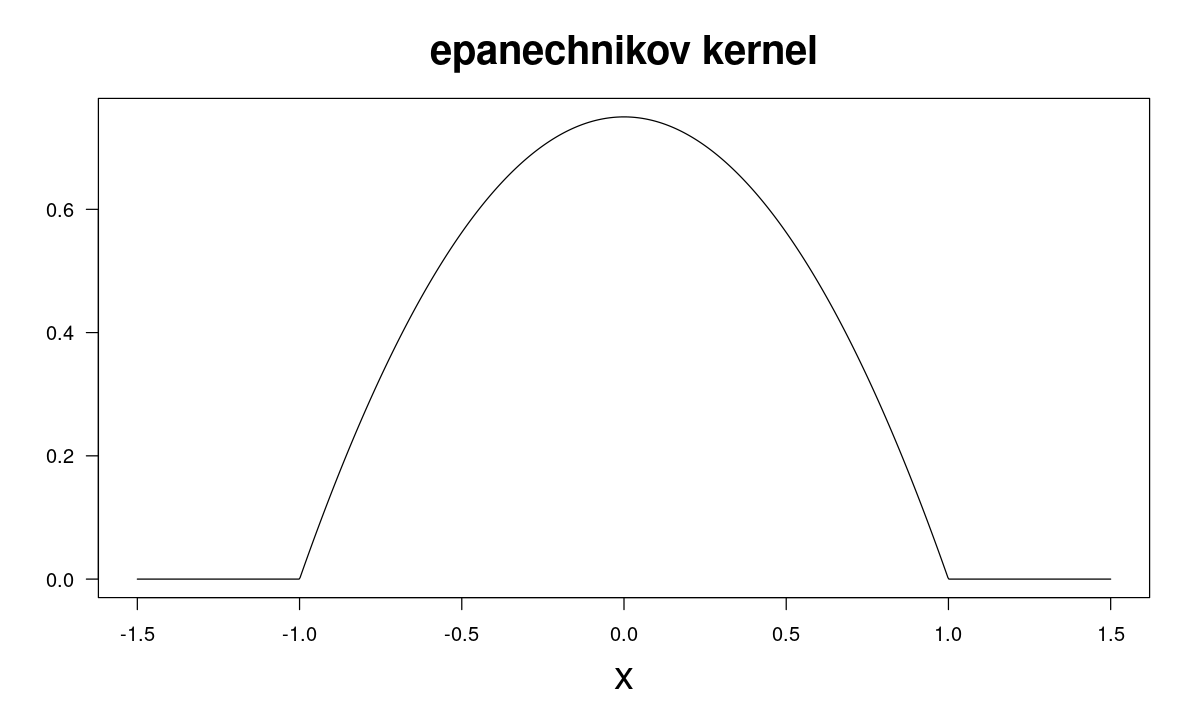

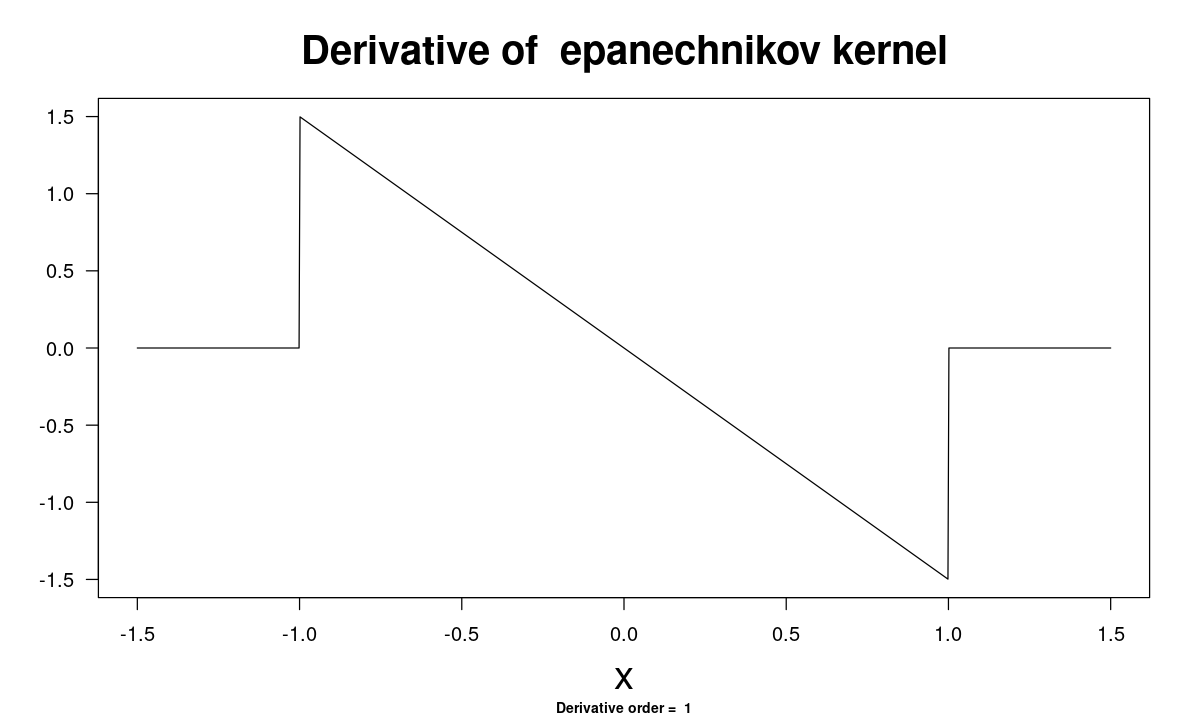

In [18]:
plot(kernel.fun(kernel = "gaussian"), cex.main = 2, cex.lab = 2)
plot(kernel.fun(kernel = "gaussian", deriv.order = 1), cex.main = 2, cex.lab = 2)
plot(kernel.fun(kernel = "epanechnikov"), cex.main = 2, cex.lab = 2)
plot(kernel.fun(kernel = "epanechnikov", deriv.order = 1), cex.main = 2, cex.lab = 2)

Сгенерируем выборку

In [20]:
sample <- runif(n = 100)

Оценка плотности при помощи гауссовского ядра


Data: sample (100 obs.);	Kernel: gaussian

Derivative order: 0;	Bandwidth 'h' = 0.1026

  eval.points           est.fx         
 Min.   :-0.40931   Min.   :0.0000284  
 1st Qu.: 0.04517   1st Qu.:0.0355442  
 Median : 0.49965   Median :0.6228217  
 Mean   : 0.49965   Mean   :0.5490027  
 3rd Qu.: 0.95414   3rd Qu.:0.9023103  
 Max.   : 1.40862   Max.   :1.2862769  

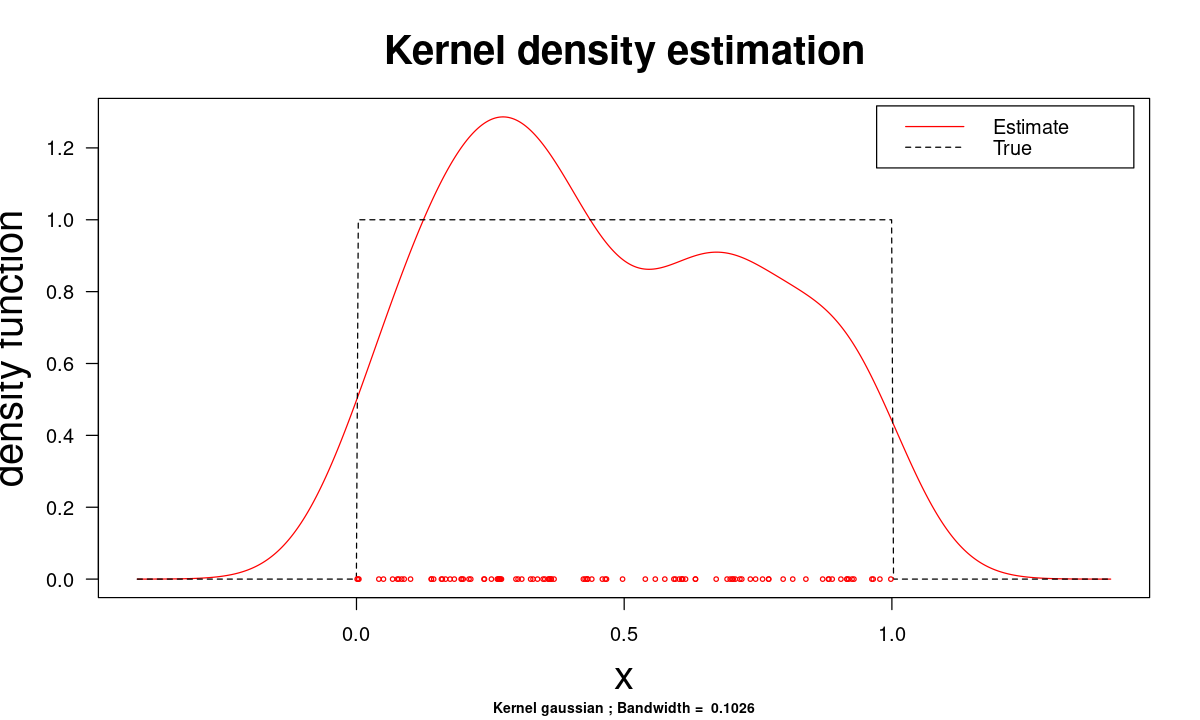

In [21]:
dens.est <- dkde(sample, deriv.order = 0)
dens.est
plot(dens.est, dunif, cex.main = 2, cex.lab = 2)
points(sample, rep(0, 100), cex = 0.5, col = 'red')

Оценка плотности при помощи равномерного ядра


Data: sample (100 obs.);	Kernel: uniform

Derivative order: 0;	Bandwidth 'h' = 0.1813

  eval.points          est.fx      
 Min.   :-0.7238   Min.   :0.0000  
 1st Qu.:-0.1121   1st Qu.:0.0000  
 Median : 0.4997   Median :0.1379  
 Mean   : 0.4997   Mean   :0.4077  
 3rd Qu.: 1.1114   3rd Qu.:0.8550  
 Max.   : 1.7232   Max.   :1.2963  

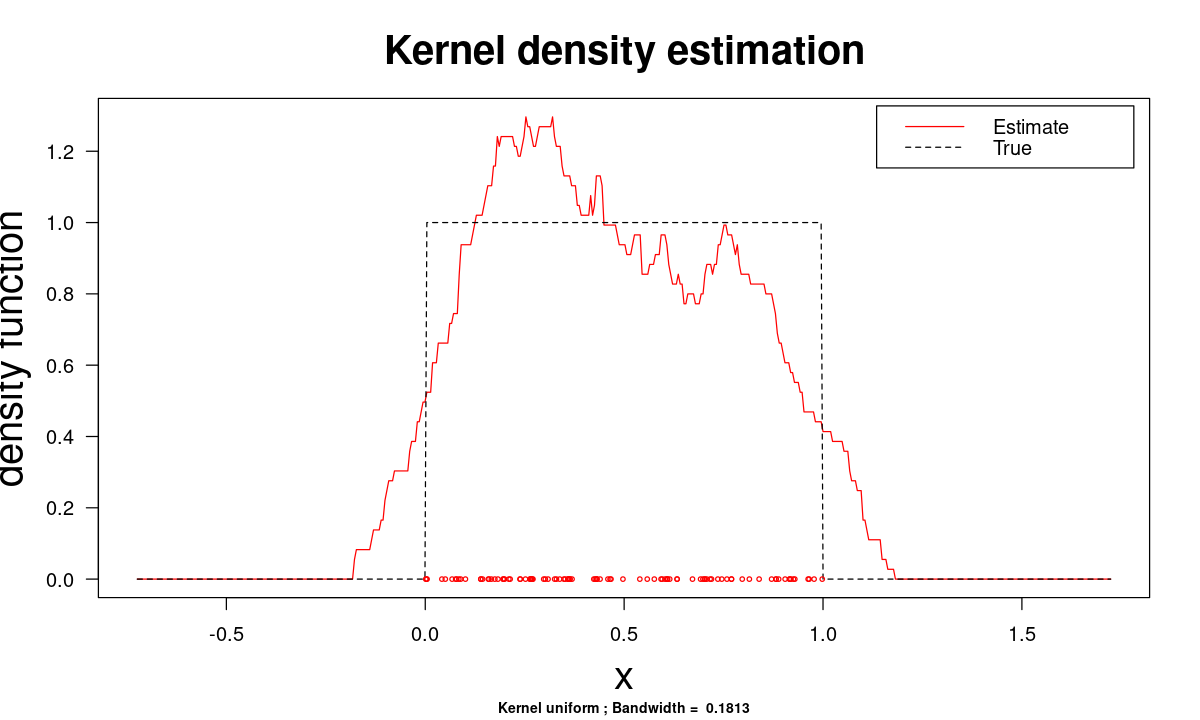

In [22]:
dens.est <- dkde(sample, deriv.order = 0, kernel = 'uniform')
dens.est
plot(dens.est, dunif, cex.main = 2, cex.lab = 2)
points(sample, rep(0, 100), cex = 0.5, col = 'red')

Один из способов выбора оптимального $h$ (огромные формулы см. в документации)

In [23]:
h.mlcv(sample)
h.mlcv(sample, kernel = 'epanechnikov')


Call:		Maximum-Likelihood Cross-Validation

Data: sample (100 obs.);	Kernel: gaussian
Max CV = -0.1048;	Bandwidth 'h' = 0.1058



Call:		Maximum-Likelihood Cross-Validation

Data: sample (100 obs.);	Kernel: epanechnikov
Max CV = -0.07551;	Bandwidth 'h' = 0.1178


$kernel
[1] "gaussian"

$seq.bws
 [1] 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065
[13] 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115 0.120 0.125
[25] 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175 0.180 0.185
[37] 0.190 0.195 0.200

$mlcv
 [1] -0.17455648 -0.09819337 -0.07936382 -0.07622609 -0.07689376 -0.07763100
 [7] -0.07792551 -0.07814318 -0.07862717 -0.07951529 -0.08081116 -0.08247119
[13] -0.08444702 -0.08669665 -0.08918411 -0.09187814 -0.09475181 -0.09778286
[19] -0.10095384 -0.10425187 -0.10766789 -0.11119575 -0.11483122 -0.11857109
[25] -0.12241242 -0.12635206 -0.13038628 -0.13451068 -0.13872012 -0.14300886
[31] -0.14737068 -0.15179907 -0.15628738 -0.16082907 -0.16541778 -0.17004753
[37] -0.17471277 -0.17940848 -0.18413019

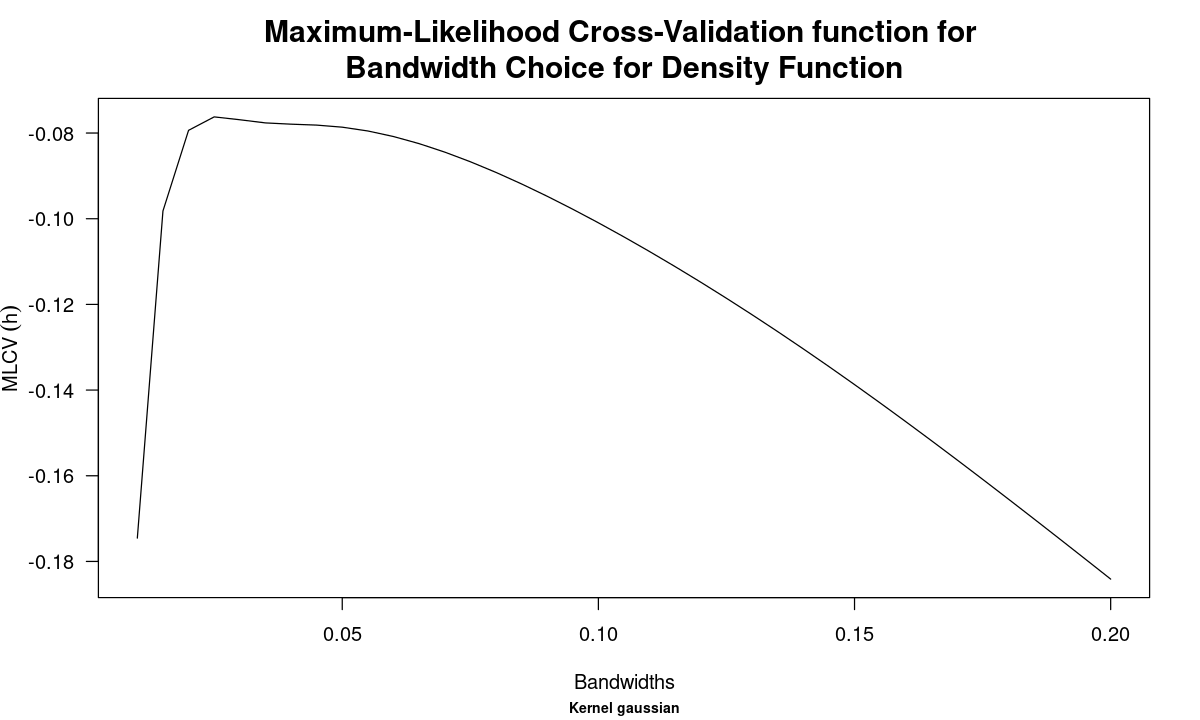

In [28]:
plot(h.mlcv(sample), seq.bws = seq(0.01, 0.2, 0.005), , cex.main = 1.5)

In [29]:
h.ccv(sample)


Call:		Complete Cross-Validation

Derivative order = 0
Data: sample (100 obs.);	Kernel: gaussian
Min CCV = 0.03488924;	Bandwidth 'h' = 0.0988965


$kernel
[1] "gaussian"

$deriv.order
[1] 0

$seq.bws
 [1] 0.010 0.015 0.020 0.025 0.030 0.035 0.040 0.045 0.050 0.055 0.060 0.065
[13] 0.070 0.075 0.080 0.085 0.090 0.095 0.100 0.105 0.110 0.115 0.120 0.125
[25] 0.130 0.135 0.140 0.145 0.150 0.155 0.160 0.165 0.170 0.175 0.180 0.185
[37] 0.190 0.195 0.200 0.205 0.210 0.215 0.220 0.225 0.230 0.235 0.240 0.245
[49] 0.250 0.255 0.260 0.265 0.270 0.275 0.280 0.285 0.290 0.295 0.300 0.305
[61] 0.310 0.315 0.320 0.325 0.330 0.335 0.340 0.345 0.350 0.355 0.360 0.365
[73] 0.370 0.375 0.380 0.385 0.390 0.395 0.400

$ccv
 [1] 0.38071969 0.27239571 0.20349082 0.17208621 0.14592398 0.11938765
 [7] 0.09481857 0.07527214 0.06158442 0.05261202 0.04672154 0.04269670
[13] 0.03985898 0.03786472 0.03651368 0.03565530 0.03516292 0.03493403
[19] 0.03489373 0.03499400 0.03520919 0.03552944 0.03595413 0.03648633
[25] 0.03712871 0.03788106 0.03873906 0.03969411 0.04073382 0.04184296
[31] 0.04300451 0.04420082 0.04541457 0.04662962 0.04783164 0.04900851
[37] 0.05015061 0.05125085 0.05230463 0.05330972 0.05426598 0.05517517
[43] 0.05604056 0.05686674 0.05765926 0.05842440 0.05916887 0.05989967
[49] 0.06062382 0.06134822 0.06207954 0.06282405 0.06358760 0.06437548
[55] 0.06519245 0.06604265 0.06692960 0.06785623 0.06882484 0.06983716
[61] 0.07089436 0.07199708 0.07314544 0.07433914 0.07557745 0.07685925
[67] 0.07818311 0.07954729 0.08094981 0.08238847 0.08386089 0.08536455
[73] 0.08689682 0.08845498 0.09003628 0.09163791 0.09325707 0.09489098
[79] 0.09653687

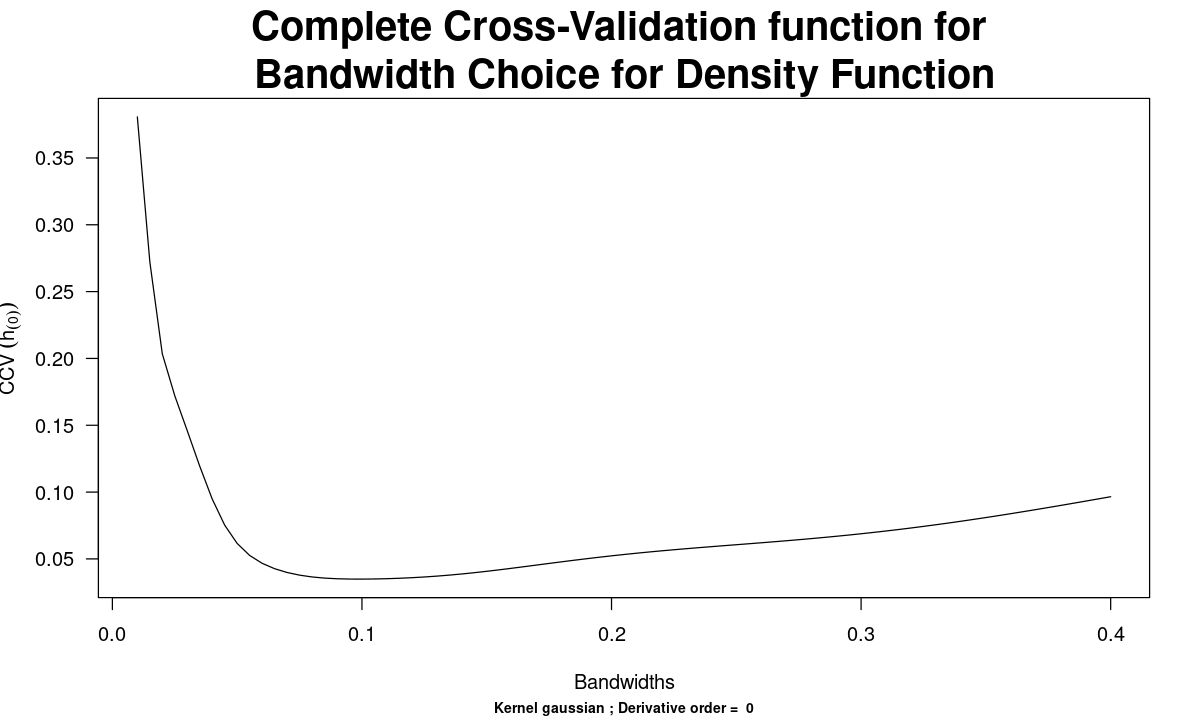

In [30]:
plot(h.ccv(sample), seq.bws = seq(0.01, 0.4, 0.005), cex.main = 2)

## Ядерная регрессия

Полная документация с примерами https://cran.r-project.org/web/packages/np/vignettes/np.pdf

Возьмем датасет о зависимости заработной платы (логарифм) от возраста по данным переписи населения в Канаде 1971 года. Датасет содержит информацию о 205 мужчинах, имеющих одинаковое образование (grade 13).

In [31]:
data("cps71")
cps71[1:5,]

,logwage,age
,<dbl>,<dbl>
1,11.1563,21
2,12.8131,22
3,13.0960,22
4,11.6952,22
5,11.5327,22


Линейная модель (параметрическая)

In [32]:
model.par <- lm(logwage ~ age + I(age^2), data = cps71)
summary(model.par)


Call:
lm(formula = logwage ~ age + I(age^2), data = cps71)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4041 -0.1711  0.0884  0.3182  1.3940 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.0419773  0.4559986  22.022  < 2e-16 ***
age          0.1731310  0.0238317   7.265 7.96e-12 ***
I(age^2)    -0.0019771  0.0002898  -6.822 1.02e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5608 on 202 degrees of freedom
Multiple R-squared:  0.2308,	Adjusted R-squared:  0.2232 
F-statistic:  30.3 on 2 and 202 DF,  p-value: 3.103e-12


Нелинейная

In [33]:
?npreg

In [34]:
model.np <- npreg(logwage ~ age, data = cps71, regtype = "ll",
                  bwmethod = "cv.aic", gradients = TRUE)
summary(model.np)

                   
Regression Data: 205 training points, in 1 variable(s)
                   age
Bandwidth(s): 2.805308

Kernel Regression Estimator: Local-Linear
Bandwidth Type: Fixed
Residual standard error: 0.5215268
R-squared: 0.3251639

Continuous Kernel Type: Second-Order Gaussian
No. Continuous Explanatory Vars.: 1



In [35]:
npsigtest.res <- npsigtest(model.np)

Bootstrap replication 1/399 for variable 1 of (1)...Bootstrap replication 2/399 for variable 1 of (1)...Bootstrap replication 3/399 for variable 1 of (1)...Bootstrap replication 4/399 for variable 1 of (1)...Bootstrap replication 5/399 for variable 1 of (1)...Bootstrap replication 6/399 for variable 1 of (1)...Bootstrap replication 7/399 for variable 1 of (1)...Bootstrap replication 8/399 for variable 1 of (1)...Bootstrap replication 9/399 for variable 1 of (1)...Bootstrap replication 10/399 for variable 1 of (1)..Bootstrap replication 11/399 for variable 1 of (1)..Bootstrap replication 12/399 for variable 1 of (1)..Bootstrap replication 13/399 for variable 1 of (1)..Bootstrap replication 14/399 for variable 1 of (1)..Bootstrap replication 15/399 for variable 1 of (1)..Bootstrap replication 16/399 for variable 1 of (1)..Bootstrap replication 17/399 for variable 1 of (1)..Bootstrap replication 18/399 for variable 1 of (1)..Bootstrap replication 19/399 for variable 1 of (1)..Bootstrap re

Bootstrap replication 157/399 for variable 1 of (1)...Bootstrap replication 158/399 for variable 1 of (1)...Bootstrap replication 159/399 for variable 1 of (1)...Bootstrap replication 160/399 for variable 1 of (1)...Bootstrap replication 161/399 for variable 1 of (1)...Bootstrap replication 162/399 for variable 1 of (1)...Bootstrap replication 163/399 for variable 1 of (1)...Bootstrap replication 164/399 for variable 1 of (1)...Bootstrap replication 165/399 for variable 1 of (1)...Bootstrap replication 166/399 for variable 1 of (1)...Bootstrap replication 167/399 for variable 1 of (1)...Bootstrap replication 168/399 for variable 1 of (1)...Bootstrap replication 169/399 for variable 1 of (1)...Bootstrap replication 170/399 for variable 1 of (1)...Bootstrap replication 171/399 for variable 1 of (1)...Bootstrap replication 172/399 for variable 1 of (1)...Bootstrap replication 173/399 for variable 1 of (1)...Bootstrap replication 174/399 for variable 1 of (1)...Bootstrap replication 175/3

Bootstrap replication 309/399 for variable 1 of (1)...Bootstrap replication 310/399 for variable 1 of (1)...Bootstrap replication 311/399 for variable 1 of (1)...Bootstrap replication 312/399 for variable 1 of (1)...Bootstrap replication 313/399 for variable 1 of (1)...Bootstrap replication 314/399 for variable 1 of (1)...Bootstrap replication 315/399 for variable 1 of (1)...Bootstrap replication 316/399 for variable 1 of (1)...Bootstrap replication 317/399 for variable 1 of (1)...Bootstrap replication 318/399 for variable 1 of (1)...Bootstrap replication 319/399 for variable 1 of (1)...Bootstrap replication 320/399 for variable 1 of (1)...Bootstrap replication 321/399 for variable 1 of (1)...Bootstrap replication 322/399 for variable 1 of (1)...Bootstrap replication 323/399 for variable 1 of (1)...Bootstrap replication 324/399 for variable 1 of (1)...Bootstrap replication 325/399 for variable 1 of (1)...Bootstrap replication 326/399 for variable 1 of (1)...Bootstrap replication 327/3

In [36]:
npsigtest.res


Kernel Regression Significance Test
Type I Test with IID Bootstrap (399 replications, Pivot = TRUE, joint = FALSE)
Explanatory variables tested for significance:
age (1)

                   age
Bandwidth(s): 2.805308

Individual Significance Tests
P Value: 
age < 2.22e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Графики регрессий и их градиента вместе с доверительным интервалом

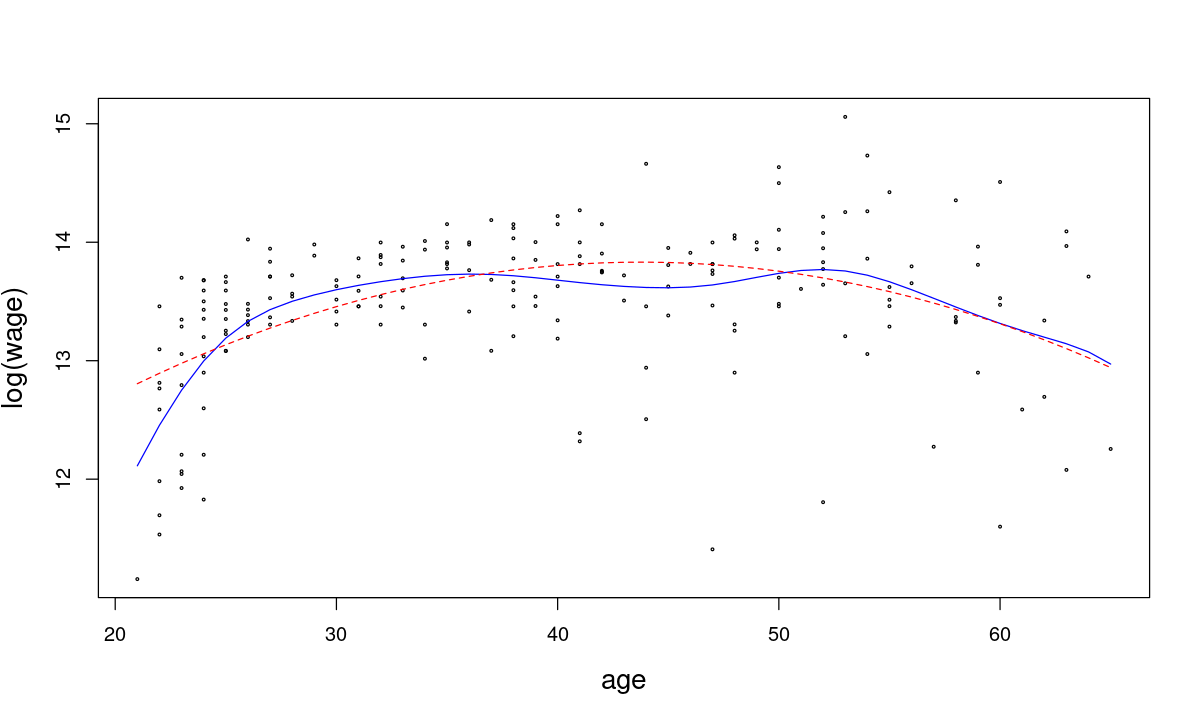

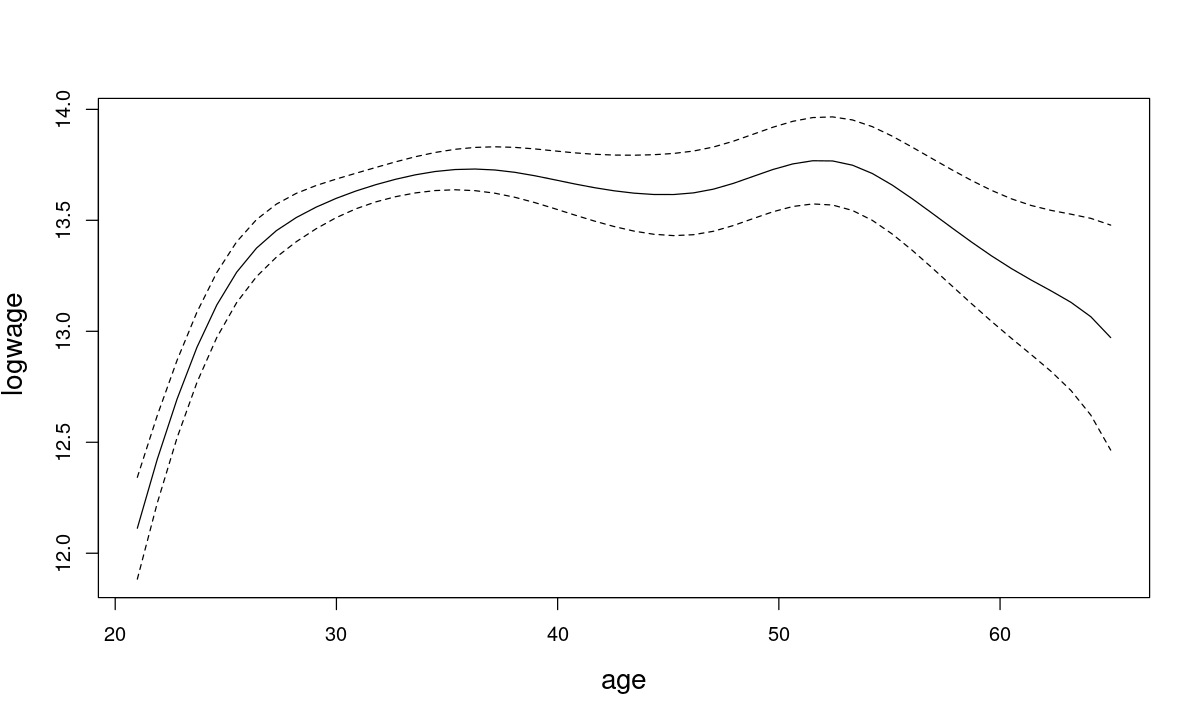

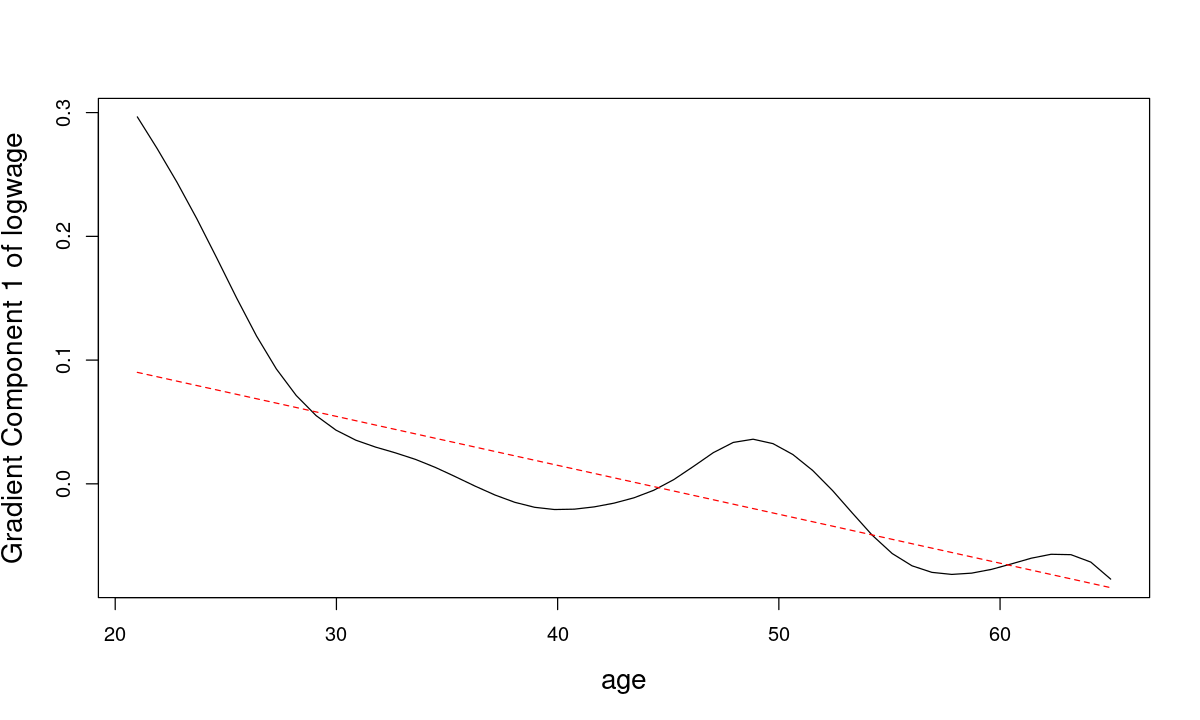

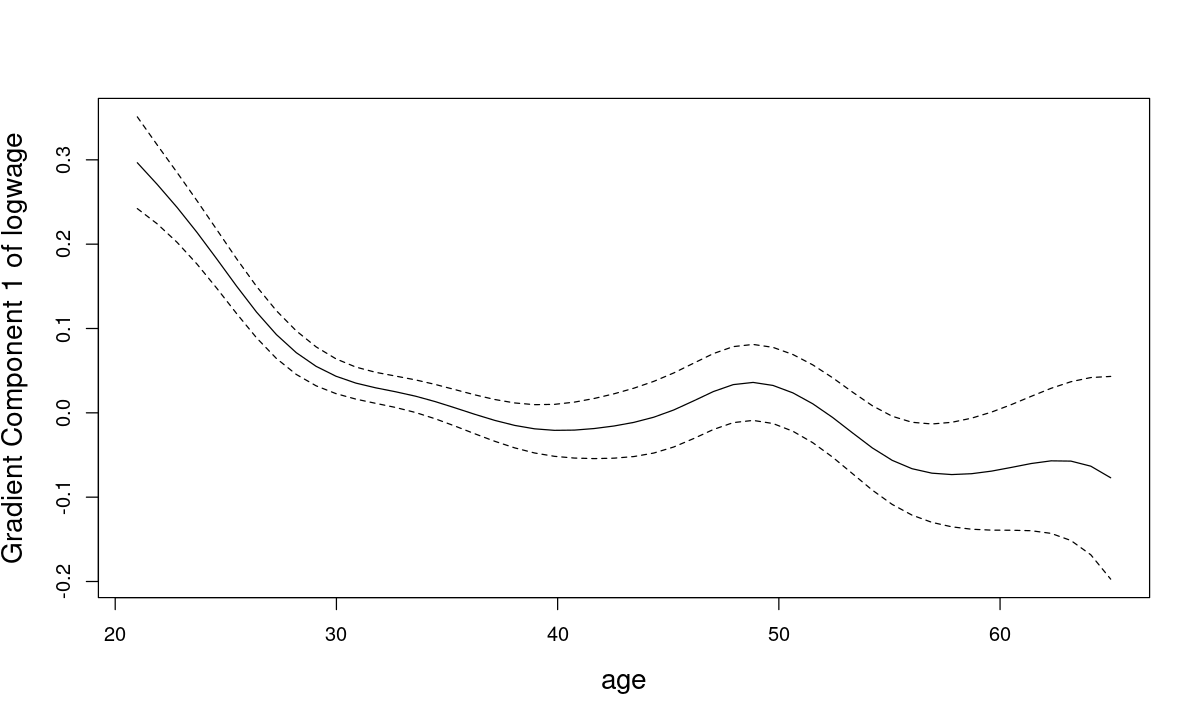

In [38]:
plot(cps71$age, cps71$logwage, xlab = "age", ylab = "log(wage)", cex=0.3, cex.lab = 1.4)
lines(cps71$age, fitted(model.np), lty = 1, col = "blue")
lines(cps71$age, fitted(model.par), lty = 2, col = " red")

plot(model.np, plot.errors.method = "asymptotic", cex.lab = 1.4)

plot(model.np, gradients = TRUE, cex.lab = 1.4)
lines(cps71$age, coef(model.par)[2]+2*cps71$age*coef(model.par)[3], 
      lty = 2, col = "red")

plot(model.np, gradients = TRUE, plot.errors.method = "asymptotic", cex.lab = 1.4)